<a href="http://esprit.tn"><img src = "https://upload.wikimedia.org/wikipedia/commons/f/ff/Logo_ESPRIT_Ariana.jpg" width = 300, align = "center"></a>



<h1 align=center><font size = 5>Examen </h1>
<h2 align=center> Niveau: 4 BI - Info. </h2>
<h2 align=center> Matière : Data mining  </h2> 
<h3 align=center> A.U. : 2018-2019 </h3> 
Durée de l'epreuve : 75 min

<br></br>

<img src="img/exam.jpg"  width = 50>
l'examen se compose de **trois parties indépendantes**. Vous pouvez commencer par la partie qui vous semble la plus convenable et abordable. Toutefois,  Une bonne lecture de l'intégralité du sujet au début de l'épreuve est fortement recommandée. Elle vous permettera de bien répartir votre effort sur les trois parties.
Il est préferable de consacrer entre 25 et 30 min pour chaque partie.
A la fin de l'épreuve, le répertoire contenant le notebook et portant votre nom et votre prénom doit &ecirc;tre remis à l'enseignant qui assure la surveillance. 

<H3> Aucun échange de documents (numérique ou papier) ou d'objets n'est autorisé durant l'examen.</H3>
<H2> Pareillement, Aucune connection internet n'est autorisée </H2>


 

### NOM & Prénom: 

### CIN:

# Partie I: Questions de reflexion (6pts)

- Quelle est la méthode la plus appropriée pour les problèmes de classification: linear régression ou bien logistic regression 

logistic regression for classification and linear regression for regression problems 

- Quels sont les différents types d'études analytiques?

In [1]:
Descriptive, predictive & prescriptive 

NameError: name 'Descriptive' is not defined

- Quelle est la différence entre la précision et le recall?

- precision =  TP /(TP+ FP)
- recall = TP / (TP+FN)

- Quel est l'algorithme d'apprentissage qui repose sur la tranformation de noyau.

In [ ]:
SVM

# Partie II: (8pts)

### Déscription du benchmark
On se propose de mener une étude prédictive qui analyse l'état de santé des patients et génère le traitement recommandé par le medecin pour ce profil de patients. En se servant de la base de données utilisé en TP, **drug200.csv**, on vous demande de mettre en place un modèle prédictif capable d'identifier pour un patient donnée le traitement adéquat.
Chaque ligne du fichier correspond aux données d'un seul patient. Un patient est representé par cinq attributs ainsi que le traitement (drug) proposé. Le but de cette étude est développer un modèle prédictif qui est capable de prédire la colonne cible drug à partir des cinq premiers attributs.

A fin de bien implémenter le modèle on vous propose de suivre la démarche proposée par ce LAB.


### Importer les modules python necessaires au pre-traitements et à la modélisation prédictive 

In [1]:
import numpy as np
import pandas as pnd
import sklearn 

### Charger les données du benchmark

In [2]:
path =  './drug200.csv'
dataset= pnd.read_csv(path)

### Vérifier les données chargées. Affichez les 10 dérnières lignes

In [3]:
dataset.shape

(200, 6)

In [4]:
dataset.tail(10)

Age Sex      BP Cholesterol  Na_to_K   Drug
190   58   M    HIGH        HIGH   18.991  drugY
191   23   M    HIGH        HIGH    8.011  drugA
192   72   M     LOW        HIGH   16.310  drugY
193   72   M     LOW        HIGH    6.769  drugC
194   46   F    HIGH        HIGH   34.686  drugY
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

### Afficher le type de chaque attribut (colonne)

In [6]:
dataset.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### Selon la formulation du problème proposée ci-dessus, quel est l'attribut qui correspont à la classe?

Drug

### Caclulez la distribution de l'attribut drug

In [9]:
dis= dataset.Drug.value_counts()
dis

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Combien de traitements (médicament) sont representés par ce benchmark?

In [14]:
dis.shape

(5,)

### Illustrer la distribution de l'attribut (drug) par une représentation graphique.

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt

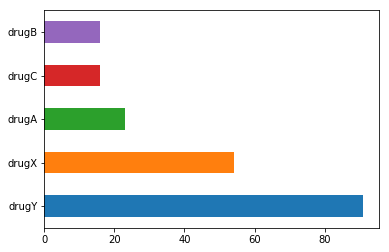

In [16]:
dis.plot(kind='barh')

In [11]:
help(dis.plot)

Help on SeriesPlotMethods in module pandas.plotting._core object:

class SeriesPlotMethods(BasePlotMethods)
 |  Series plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> s.plot.line()
 |  >>> s.plot.bar()
 |  >>> s.plot.hist()
 |  
 |  Plotting methods can also be accessed by calling the accessor as a method
 |  with the ``kind`` argument:
 |  ``s.plot(kind='line')`` is equivalent to ``s.plot.line()``
 |  
 |  Method resolution order:
 |      SeriesPlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kw

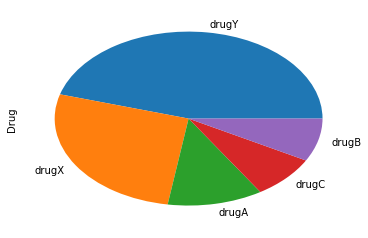

In [12]:
dis.plot(kind='pie')

### On veut concevoir le modèle prédictif en utilisant les réseaux de neurones. l'étape de pré-traitement est obligatoire. On vous demande d'appliquer dans l'ordre les pre-traitements suivants :

#### Transformer les variables (attributs) catégoriques en variables numériques

In [41]:
dataset.dtypes

Age              int64
Sex              int32
BP               int32
Cholesterol      int32
Na_to_K        float64
Drug             int32
dtype: object

In [42]:
def show_dist(df_column, tag = 'Column'):
    if not df_column.empty: 
        dist = df_column.value_counts()
        print("%s distribution:\n" %tag, dist)

#Test
show_dist(dataset.BP, tag="train dataset before ")  

train dataset before  distribution:
 0    77
1    64
2    59
Name: BP, dtype: int64


In [43]:
def get_categorical2(dataframe):
    types = dataframe.dtypes
    i = 0
    lst_cat=[]
    for var in types:
        if var == 'object':
            print(i)
            lst_cat.append(i)
        i=i+1
    return lst_cat

In [44]:
lst= get_categorical2(dataset)
for i in lst:
    print(i, dataset.columns[i])

In [45]:
import sklearn.preprocessing as etl
enc_map={}
for cat_idx in lst:
    cat_attrib= dataset.columns[cat_idx]
    print ('handling cat attribute.. ',cat_attrib)

    enc = etl.label.LabelEncoder()
    show_dist(dataset[cat_attrib], ' (before)')
    dataset[cat_attrib] = enc.fit_transform(dataset[cat_attrib])
    show_dist(dataset[cat_attrib], ' (after)')
    enc_map[cat_attrib]=enc


In [46]:
dataset[cat_attrib].describe()

KeyError: '[0 1 1 2 1 2 2 1 2 1 1 0 1 1 2 0 1 0 1 0 1 2 1 1 1 0 0 2 1 1 2 0 1 0 2 2 0\n 1 2 2 2 0 2 2 2 2 0 1 2 1 0 2 1 0 0 1 0 0 2 0 1 0 1 1 0 2 0 2 2 0 0 2 2 2\n 0 1 0 0 0 1 0 2 1 0 1 0 2 1 0 2 2 0 0 1 1 1 1 0 0 0 0 0 1 2 0 1 2 1 0 2 0\n 2 1 1 2 0 2 2 0 0 2 0 2 2 0 0 0 2 1 2 2 1 1 2 0 1 0 0 0 2 0 1 0 0 0 2 1 0\n 1 1 0 0 2 1 1 1 0 1 1 1 2 0 2 0 0 1 1 2 1 0 2 1 2 1 0 0 0 2 2 2 0 2 1 0 0\n 2 0 0 0 0 0 0 1 1 0 1 1 2 2 1] not in index'

In [47]:
e=  enc_map['Drug']
dir(e)
e.classes_

KeyError: 'Drug'

#### Norlamiser les variables numériques: 

In [63]:
X=  dataset.iloc[:,:5]
y=  dataset.iloc[:, 5]


In [64]:
#etl_norm = etl.Normalizer()
#scaler= etl_norm.fit(X)

In [65]:
#X=scaler.transform(X)

In [66]:
help(dataset.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  ``.iloc`` will raise ``IndexError`` if a requested indexer is
 |  out-of-bounds, except *slice* indexers which allow out-of-bounds
 |  indexing (this conforms with python/numpy *slice* semantics).
 |  
 |  See more at :ref:`Selection by Position <indexing.integer>`
 |  
 |  Method resolution order:
 |      _iLocIndexer
 |     

In [67]:
X[:5]

Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043

In [68]:
y[:5]

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int32

In [69]:
dataset[:5]

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4

#### Générer la base de test(40%) et d'apprentissage (60%) à partir du dérnier dataframe obtenu

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X.shape

(200, 5)

In [72]:
y.shape

(200,)

In [73]:
print (X[:5])
print(y[:5])

   Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043
0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int32


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=3)

In [75]:
print('X_train:',X_train.shape, 'Y_train', y_train.shape)
print('X_test:',X_test.shape, 'Y_test', y_test.shape)

X_train: (120, 5) Y_train (120,)
X_test: (80, 5) Y_test (80,)


In [76]:
traindata = np.array(X_train)
trainlabel = np.array(y_train)
print(traindata.shape, trainlabel.shape)
print(traindata[:5])
print(trainlabel[:5])

(120, 5) (120,)
[[60.     1.     2.     0.    15.171]
 [24.     0.     0.     1.    18.457]
 [49.     0.     2.     1.     9.381]
 [37.     1.     1.     1.     8.968]
 [32.     0.     0.     1.    10.292]]
[4 4 3 3 0]


# Partie III: (8pts)

### En se servant de la base d'apprentissage construire un réseau de neurones avec deux couches cachées représentant respectivement 6 et 4 neurones.

In [77]:
import datetime
t=datetime.datetime.now()
print(datetime.datetime.now()- t)

def init_chrono():
    return datetime.datetime.now()

def elapsed_time(t):
    if t:
        delta = init_chrono() - t
        print ('Elapsed time', delta)
        return delta 
    
# test
t = init_chrono()
elapsed_time(t)

0:00:00
Elapsed time 0:00:00


datetime.timedelta(0)

In [78]:
import sklearn.neural_network as nn
from  sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [79]:
t=init_chrono()
ANN_model = nn.MLPClassifier( hidden_layer_sizes=(20,10), max_iter=1000,solver='sgd')
tree_model= DecisionTreeClassifier(criterion="entropy", max_depth = 4)
svm_model = SVC(kernel='linear')
model= svm_model
elapsed_time(t)

Elapsed time 0:00:00


datetime.timedelta(0)

### Lancer la phase d'apprentissage du modèle predictif.

In [80]:
t= init_chrono()
model.fit(X_train, y_train)
print(model)
elapsed_time(t)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Elapsed time 0:00:00.015655


datetime.timedelta(microseconds=15655)

### Génèrer les prédictions du modèle pour de la base de test

In [81]:
expected = y_test
predicted = model.predict(X_test)

In [82]:
expected[:5]

40     4
51     3
139    3
197    3
170    3
Name: Drug, dtype: int32

In [83]:
predicted[:5]

array([4, 3, 3, 3, 3])

### Evaluer le modèle en utilisant la mesure: accuracy score

In [84]:
print("Model Accuracy: ", sklearn.metrics.accuracy_score(expected, predicted))

Model Accuracy:  0.975


### Calculer le F1-score

In [85]:
print("Model Accuracy: ", sklearn.metrics.f1_score(expected, predicted, average='macro'))

Model Accuracy:  0.979669762641899


In [86]:
cf_ANN= sklearn.metrics.confusion_matrix(expected, predicted)

In [87]:
res= pnd.DataFrame(cf_ANN)
cf_ANN

array([[ 9,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  1],
       [ 1,  0,  0,  0, 33]], dtype=int64)

In [88]:
res

0  1  2   3   4
0  9  0  0   0   0
1  0  5  0   0   0
2  0  0  6   0   0
3  0  0  0  25   1
4  1  0  0   0  33

In [91]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [99]:
plot_confusion_matrix(cf_ANN, e.classes_)

AttributeError: 'numpy.ndarray' object has no attribute 'classes_'

In [46]:
y_test.value_counts()

4    34
3    26
0     9
2     6
1     5
Name: Drug, dtype: int64

In [56]:
e.inverse_transform(np.array(2))

/usr/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'drugC'